In [24]:

import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [4]:
data = pd.read_csv("../data/crabs.csv") 
data
print (data)


     Unnamed: 0 sp sex  index    FL    RW    CL    CW    BD
0             1  B   M      1   8.1   6.7  16.1  19.0   7.0
1             2  B   M      2   8.8   7.7  18.1  20.8   7.4
2             3  B   M      3   9.2   7.8  19.0  22.4   7.7
3             4  B   M      4   9.6   7.9  20.1  23.1   8.2
4             5  B   M      5   9.8   8.0  20.3  23.0   8.2
5             6  B   M      6  10.8   9.0  23.0  26.5   9.8
6             7  B   M      7  11.1   9.9  23.8  27.1   9.8
7             8  B   M      8  11.6   9.1  24.5  28.4  10.4
8             9  B   M      9  11.8   9.6  24.2  27.8   9.7
9            10  B   M     10  11.8  10.5  25.2  29.3  10.3
10           11  B   M     11  12.2  10.8  27.3  31.6  10.9
11           12  B   M     12  12.3  11.0  26.8  31.5  11.4
12           13  B   M     13  12.6  10.0  27.7  31.7  11.4
13           14  B   M     14  12.8  10.2  27.2  31.8  10.9
14           15  B   M     15  12.8  10.9  27.4  31.5  11.0
15           16  B   M     16  12.9  11.

In [5]:
x=data.iloc[:,4:9].values

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
x = StandardScaler().fit_transform(x)
x

array([[-2.14623182e+00, -2.35244988e+00, -2.25392649e+00,
        -2.21777180e+00, -2.05798865e+00],
       [-1.94546178e+00, -1.96287468e+00, -1.97228249e+00,
        -1.98853816e+00, -1.94089947e+00],
       [-1.83073603e+00, -1.92391716e+00, -1.84554270e+00,
        -1.78477492e+00, -1.85308259e+00],
       [-1.71601029e+00, -1.88495963e+00, -1.69063850e+00,
        -1.69562851e+00, -1.70672111e+00],
       [-1.65864742e+00, -1.84600211e+00, -1.66247410e+00,
        -1.70836371e+00, -1.70672111e+00],
       [-1.37183306e+00, -1.45642691e+00, -1.28225470e+00,
        -1.26263163e+00, -1.23836441e+00],
       [-1.28578876e+00, -1.10580922e+00, -1.16959711e+00,
        -1.18622042e+00, -1.23836441e+00],
       [-1.14238158e+00, -1.41746939e+00, -1.07102171e+00,
        -1.02066279e+00, -1.06273064e+00],
       [-1.08501871e+00, -1.22268178e+00, -1.11326831e+00,
        -1.09707400e+00, -1.26763670e+00],
       [-1.08501871e+00, -8.72064099e-01, -9.72446308e-01,
        -9.06045967e-01

In [8]:
from sklearn.decomposition import PCA as sklearnPCA

In [9]:
pca = sklearnPCA(n_components = 2)

In [10]:
principalComponents = pca.fit_transform(x)

In [11]:
principaldata = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldata.head(2)

Axe principal 1  Axe principal 2
0         4.927573        -0.268445
1         4.386176        -0.094074

In [14]:
finaldata = pd.concat([principaldata, data[['sp']]], axis = 1)
finaldata.head(4)

Axe principal 1  Axe principal 2 sp
0         4.927573        -0.268445  B
1         4.386176        -0.094074  B
2         4.128664        -0.168876  B
3         3.883681        -0.246008  B

In [15]:
import matplotlib.pyplot as plt

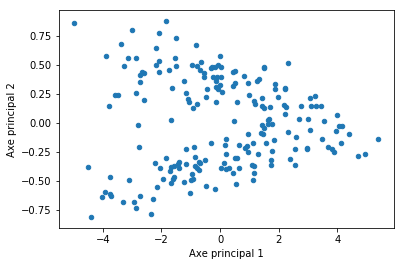

In [16]:
# Première représentation graphique sans distinction sur la variable qualitative
finaldata.plot.scatter(x='Axe principal 1', y='Axe principal 2')

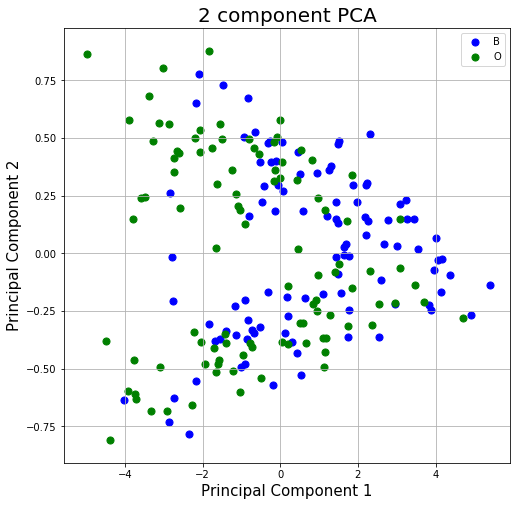

In [17]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B','O']
colors = ['b', 'g',]
for target, color in zip(targets,colors):
    indicesToKeep = finaldata['sp'] == target
    ax.scatter(finaldata.loc[indicesToKeep, 'Axe principal 1']
               , finaldata.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [18]:
finaldata2=pd.concat([principaldata, data[['sex']]], axis = 1)
finaldata2.head(4)

Axe principal 1  Axe principal 2 sex
0         4.927573        -0.268445   M
1         4.386176        -0.094074   M
2         4.128664        -0.168876   M
3         3.883681        -0.246008   M

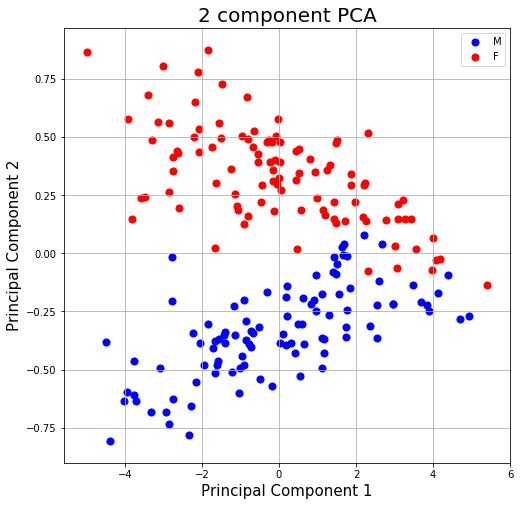

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M','F']
colors = ['b', 'r',]
for target, color in zip(targets,colors):
    indicesToKeep = finaldata2['sex'] == target
    ax.scatter(finaldata2.loc[indicesToKeep, 'Axe principal 1']
               , finaldata2.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [21]:
pca.explained_variance_ratio_

array([0.95776696, 0.03033704])

In [26]:
data['CAT'] = np.where((data.sex=='F') & (data.sp =='O'), 'FO', (np.where((data.sex=='F') & (data.sp =='B'),'FB',(np.where((data.sex=='M') & (data.sp =='B'),'MB',(np.where((data.sex=='M') & (data.sp =='O'),'MO','N')))))))


In [27]:
data.head(2)

Unnamed: 0 sp sex  index   FL   RW    CL    CW   BD CAT
0           1  B   M      1  8.1  6.7  16.1  19.0  7.0  MB
1           2  B   M      2  8.8  7.7  18.1  20.8  7.4  MB

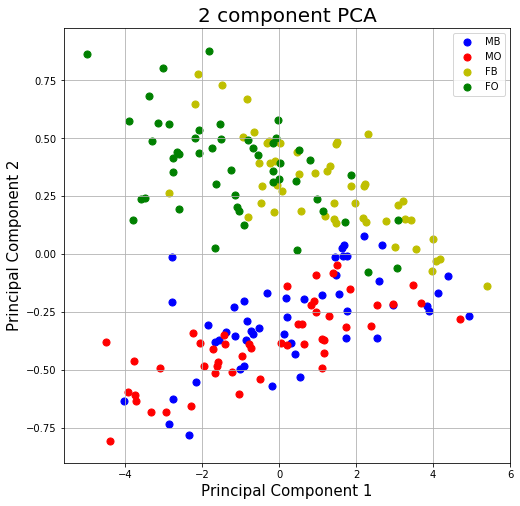

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['MB','MO','FB','FO']
colors = ['b', 'r','y','g']
for target, color in zip(targets,colors):
    indicesToKeep = data['CAT'] == target
    ax.scatter(finaldata.loc[indicesToKeep, 'Axe principal 1']
               , finaldata.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()